<a href="https://colab.research.google.com/github/yogivirat/stat_541_final_project/blob/master/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(409)


In [12]:
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
file_path = '/content/drive/My Drive/Colab Notebooks/ml-scratch-posts/data/Daily_Demand_Forecasting_Orders.csv'


In [14]:
data = pd.read_csv(file_path, delimiter=';')
data.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [ ]:
# Define the new column names
new_column_names = [
    'Week_of_month',
    'Day_of_week',
    'Non_urgent_orders',
    'Urgent_orders',
    'Order_type_A',
    'Order_type_B',
    'Order_type_C',
    'Fiscal_sector_orders',
    'Orders_from_traffic_controller',
    'Banking_orders_1',
    'Banking_orders_2',
    'Banking_orders_3',
    'Target_Total_orders'
]

# Rename the columns
data.columns = new_column_names

In [ ]:
data.head()

,Week_of_month,Day_of_week,Non_urgent_orders,Urgent_orders,Order_type_A,Order_type_B,Order_type_C,Fiscal_sector_orders,Orders_from_traffic_controller,Banking_orders_1,Banking_orders_2,Banking_orders_3,Target_Total_orders
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


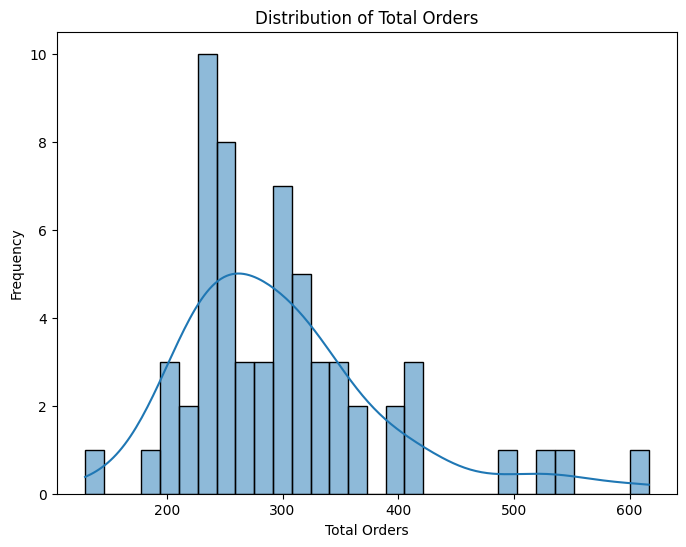

In [ ]:
# Plot histogram for the target variable (Total orders)
plt.figure(figsize=(8, 6))
sns.histplot(data['Target_Total_orders'], bins=30, kde=True)
plt.title('Distribution of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()

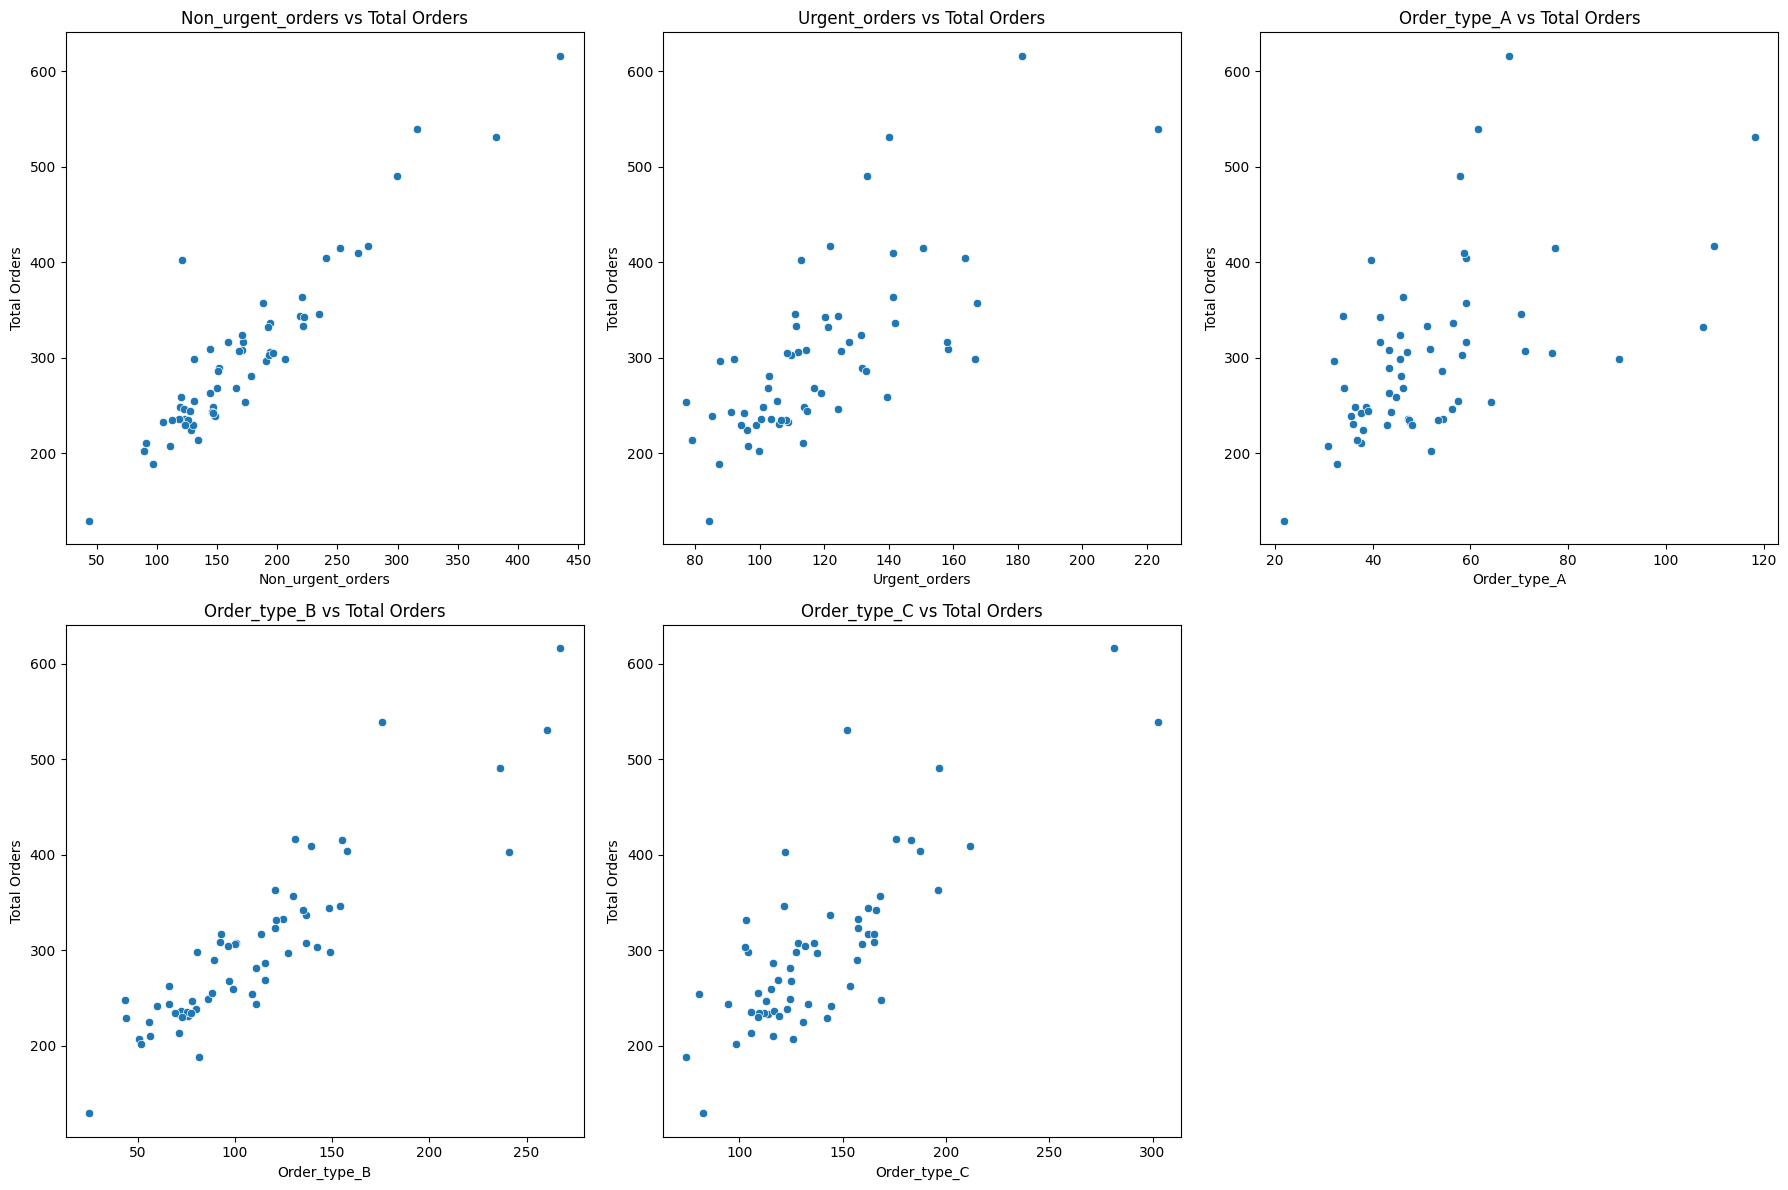

In [ ]:
selected_features = ['Non_urgent_orders', 'Urgent_orders', 'Order_type_A', 'Order_type_B', 'Order_type_C']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate through selected features and plot them
for i, feature in enumerate(selected_features):
    sns.scatterplot(x=feature, y='Target_Total_orders', data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Total Orders')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Orders')

# Hide the last subplot (bottom right)
axes[-1].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


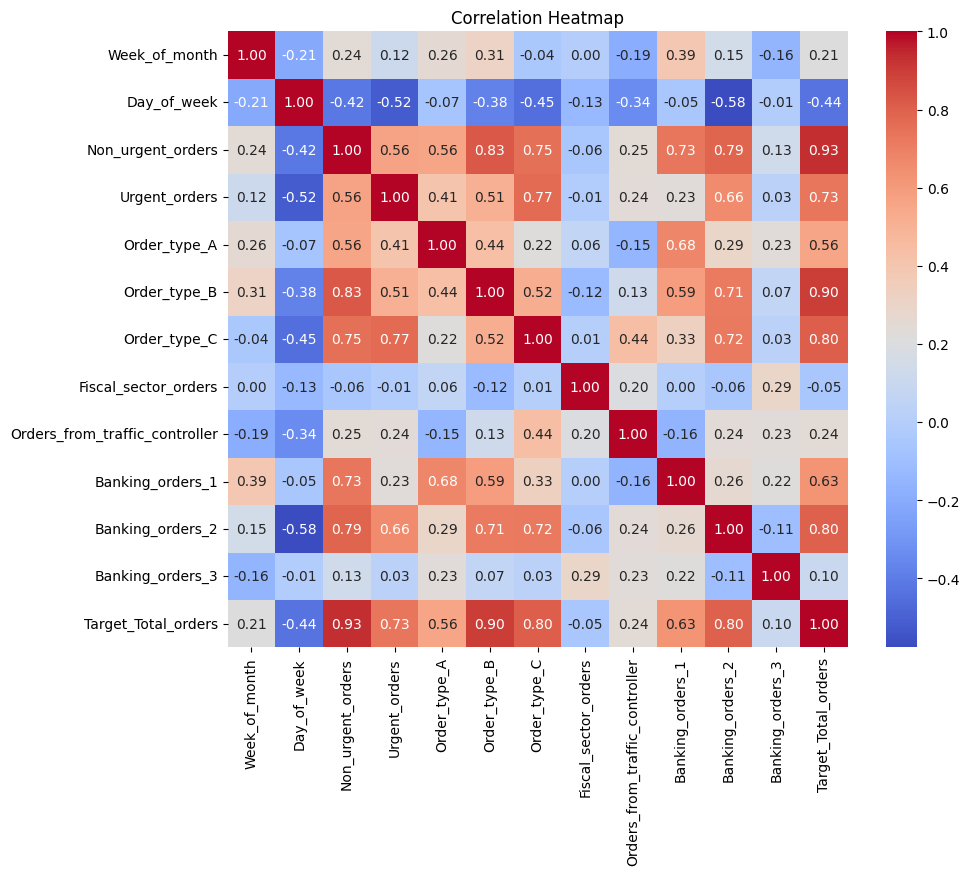

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                                Week_of_month  Day_of_week  Non_urgent_orders  \
Week_of_month                        1.000000    -0.207791           0.243472   
Day_of_week                         -0.207791     1.000000          -0.416331   
Non_urgent_orders                    0.243472    -0.416331           1.000000   
Urgent_orders                        0.118258    -0.517106           0.564796   
Order_type_A                         0.256115    -0.068894           0.561397   
Order_type_B                         0.312767    -0.376512           0.827186   
Order_type_C                        -0.041582    -0.448823           0.752627   
Fiscal_sector_orders                 0.000964    -0.132397          -0.057150   
Orders_from_traffic_controller      -0.194088    -0.339485           0.246937   
Banking_orders_1                     0.392310    -0.051815           0.732357   
Banking_orders_2                     0.147086    -0.577035           0.788192   
Banking_

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Week_of_month                     0
Day_of_week                       0
Non_urgent_orders                 0
Urgent_orders                     0
Order_type_A                      0
Order_type_B                      0
Order_type_C                      0
Fiscal_sector_orders              0
Orders_from_traffic_controller    0
Banking_orders_1                  0
Banking_orders_2                  0
Banking_orders_3                  0
Target_Total_orders               0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=["Target_Total_orders"])  # Features
y = data["Target_Total_orders"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 48
Testing set size: 12


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Step 4: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # taking square root of MSE to get RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 3301.721138390172
Root Mean Squared Error: 57.46060509940852
R-squared: 0.677421158517971


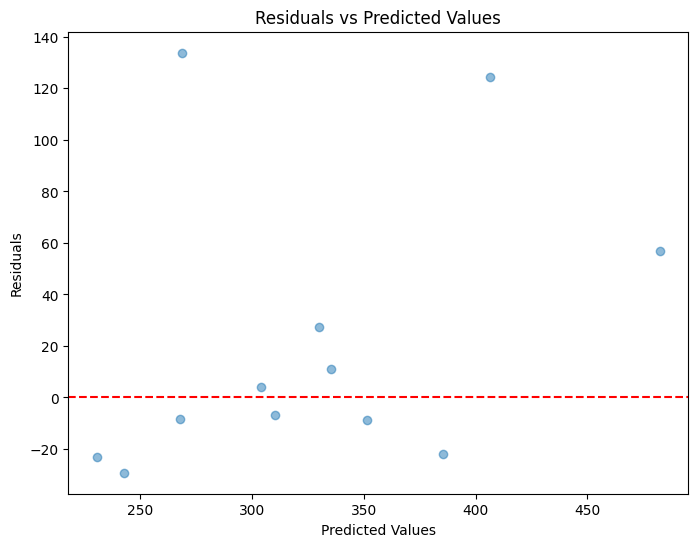

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot a scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 3594.2491314624563
Root Mean Squared Error: 59.95205694104629
R-squared: 0.6488411127929923


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures object
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data to create polynomial features
X_train_poly = poly_features.fit_transform(X_train)

# Transform the testing data using the same polynomial features
X_test_poly = poly_features.transform(X_test)

# Print the shape of the transformed training and testing data
print("Shape of transformed training data:", X_train_poly.shape)
print("Shape of transformed testing data:", X_test_poly.shape)

Shape of transformed training data: (48, 90)
Shape of transformed testing data: (12, 90)


In [ ]:
# Step 1: Initialize the Random Forest Regressor model
rf_regressor_poly = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the polynomial training data
rf_regressor_poly.fit(X_train_poly, y_train)

# Step 3: Make predictions on the polynomial testing data
y_pred_poly = rf_regressor_poly.predict(X_test_poly)

# Step 4: Evaluate the model's performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Squared Error (with polynomial features):", mse_poly)
print("Root Mean Squared Error (with polynomial features):", rmse_poly)
print("R-squared (with polynomial features):", r2_poly)


Mean Squared Error (with polynomial features): 2106.52794017701
Root Mean Squared Error (with polynomial features): 45.896927350063535
R-squared (with polynomial features): 0.7941917824037859


In [ ]:
# Define hyperparameters to tune
param_grid_poly = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object for the polynomial model
grid_search_poly = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_poly, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search_poly.fit(X_train_poly, y_train)

# Get the best hyperparameters for the polynomial model
best_params_poly = grid_search_poly.best_params_
print("Best Hyperparameters (with polynomial features):", best_params_poly)

# Get the best model for the polynomial features
best_rf_regressor_poly = grid_search_poly.best_estimator_

# Make predictions on the testing data using the best polynomial model
y_pred_poly_tuned = best_rf_regressor_poly.predict(X_test_poly)

# Evaluate the performance of the tuned polynomial model
mse_poly_tuned = mean_squared_error(y_test, y_pred_poly_tuned)
rmse_poly_tuned = mean_squared_error(y_test, y_pred_poly_tuned, squared=False)
r2_poly_tuned = r2_score(y_test, y_pred_poly_tuned)

print("Mean Squared Error (with tuned polynomial features):", mse_poly_tuned)
print("Root Mean Squared Error (with tuned polynomial features):", rmse_poly_tuned)
print("R-squared (with tuned polynomial features):", r2_poly_tuned)


Best Hyperparameters (with polynomial features): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (with tuned polynomial features): 2619.408023448456
Root Mean Squared Error (with tuned polynomial features): 51.18015263213325
R-squared (with tuned polynomial features): 0.7440832916662623


In [ ]:
# Select the features with high correlation with the target variable
selected_features = corr_matrix[abs(corr_matrix['Target_Total_orders']) > 0.5].index.tolist()

# Drop the target variable from the list of selected features
selected_features.remove('Target_Total_orders')

# Print the selected features
print("Selected Features:", selected_features)

# Extract the corresponding columns from the original dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the best model (best_rf_regressor_poly) on the selected features
best_rf_regressor_poly.fit(X_train_selected, y_train)

# Make predictions on the testing data using the model trained on selected features
y_pred_selected = best_rf_regressor_poly.predict(X_test_selected)

# Evaluate the performance of the model trained on selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nPerformance on Selected Features:")
print("Mean Squared Error:", mse_selected)
print("Root Mean Squared Error:", rmse_selected)
print("R-squared:", r2_selected)


Selected Features: ['Non_urgent_orders', 'Urgent_orders', 'Order_type_A', 'Order_type_B', 'Order_type_C', 'Banking_orders_1', 'Banking_orders_2']

Performance on Selected Features:
Mean Squared Error: 3427.8338003071876
Root Mean Squared Error: 58.54770533767474
R-squared: 0.6650999252362164


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(best_rf_regressor_poly, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores: [ 604.27503242  208.97688728 3647.46133485 1145.77657931  613.51963264]
Mean Cross-Validation Score: 1244.0018932981416
Standard Deviation of Cross-Validation Scores: 1238.087282876781


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoost Regressor with the best Random Forest Regressor as base estimator
adaboost_regressor = AdaBoostRegressor(base_estimator=best_rf_regressor_poly)

# Define hyperparameters to search
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid_adaboost,
                                    cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search
grid_search_adaboost.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params_adaboost = grid_search_adaboost.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Get the best AdaBoost model
best_adaboost_regressor = grid_search_adaboost.best_estimator_

# Make predictions on the testing data using the best AdaBoost model
y_pred_adaboost = best_adaboost_regressor.predict(X_test_selected)

# Evaluate the performance of the AdaBoost model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=False)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print("\nPerformance of the AdaBoost Model:")
print("Mean Squared Error:", mse_adaboost)
print("Root Mean Squared Error:", rmse_adaboost)
print("R-squared:", r2_adaboost)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 100}

Performance of the AdaBoost Model:
Mean Squared Error: 1264.9159868030592
Root Mean Squared Error: 35.565657407154156
R-squared: 0.876417445177101


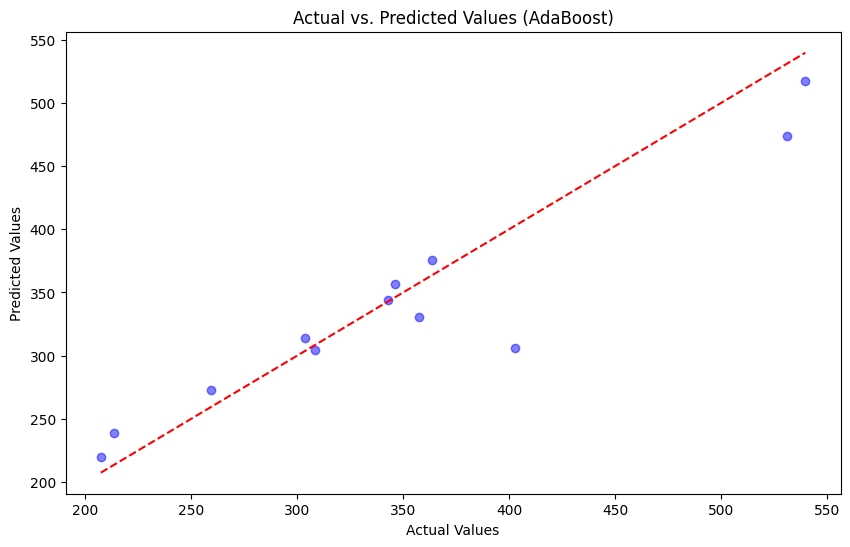

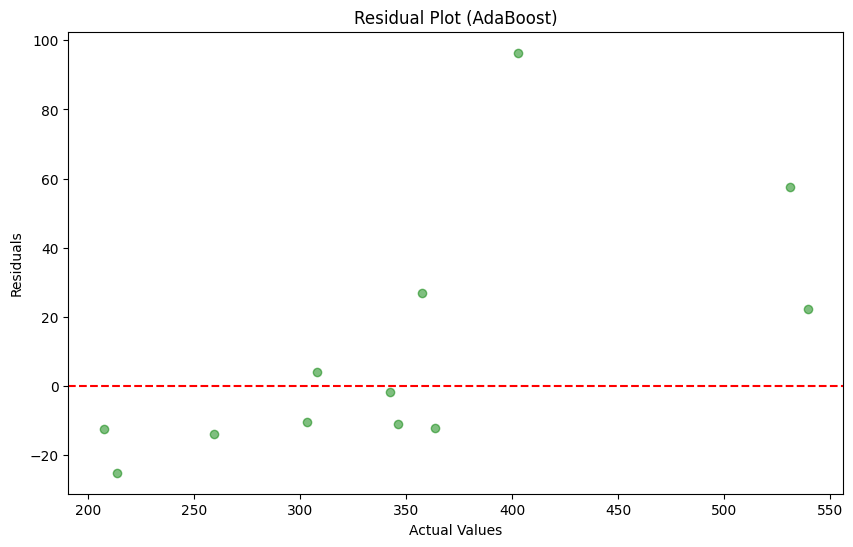

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals_adaboost = y_test - y_pred_adaboost

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values (AdaBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_adaboost, color='green', alpha=0.5)
plt.title('Residual Plot (AdaBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
